Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за такую хорошую работу, мне она очень понравилась 
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
* Тебе удалось успешно справиться с текущей задачей. Поздравляю!
* Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту.


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Спасибо за отзыв и комментарии! Несколько изменил ноут в соответствии с ними.
К GridSearch и RandomizedSearch хотелось бы вернуться когда в курсе пойдет кросс-валидация.
А пока немного подробнее разобрать DummyClassifier.
</div>


<div class="alert alert-block alert-success">
<b>Ревьювер[2]:</b> Спасибо за оперативность, приятно видеть фидбек. Рад был быть полезен. Удачи в дальнейшем обучении!

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier



<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что собираешь все импорты в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
  
</div>

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


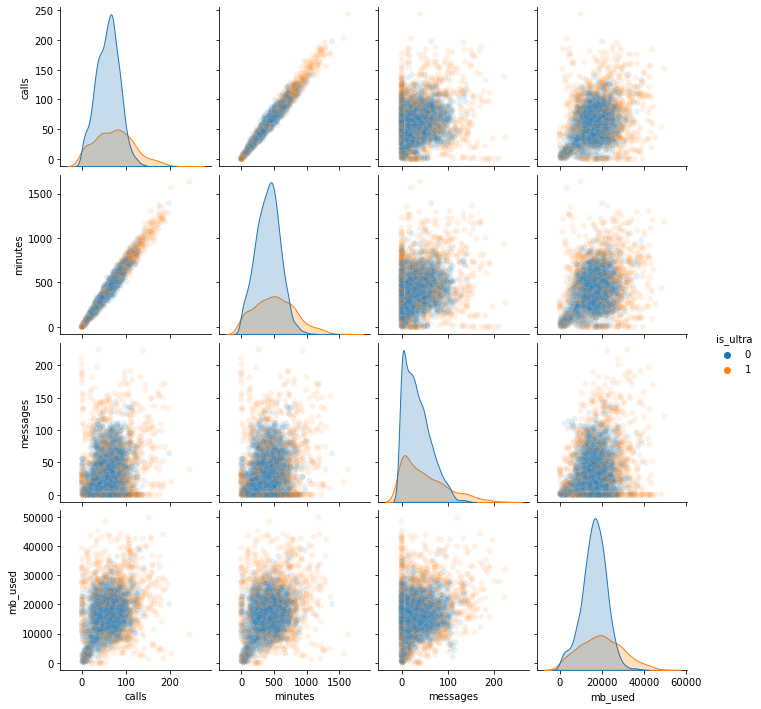

In [6]:
fig = sns.pairplot(
    data,
    hue='is_ultra',
    plot_kws={
        'alpha': 0.1,
    },
)


 
<div class="alert alert-info">
    
<b>Совет</b> Не забывай про вывод.
Также важно изучить корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод `sns.pairplot` с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать в текущем или последующих проектах. </div>

</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b>
Добавлен график. Красивый )
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Можно увидеть корреляцию мжду звонками и минутами, это называется мультиколленаиарностью. Если мы удалим один из признаков, это может положительно сказаться на эффективности моделей
</div>

## Разбейте данные на выборки

In [7]:
features_columns = [
    'calls',
    'minutes',
    'messages',
    'mb_used',
]
target_columns = [
    'is_ultra',
]

In [8]:
X = data[features_columns]
y = data[target_columns]


С помощью последовательного применения функции train_test_split данные разбиваются на 3 группы - тренировочную, валидационную и тестовую. При этом, стратифицируются по доле тарифов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за стратификацию
  
</div>

In [9]:
train_size = 0.6
valid_size = 0.2
test_size = 0.2
random_state = 12345

X_model, X_test, y_model, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    random_state=random_state,
    stratify=data[target_columns],
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_model,
    y_model,
    test_size=valid_size / (train_size + valid_size),
    random_state=random_state,
    stratify=y_model,
)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(1928, 4)
(1928, 1)
(643, 4)
(643, 1)
(643, 4)
(643, 1)


<div class="alert alert-block alert-success">
    
<b>Успех:</b> С разбиением все в порядке,
  </div>  
  <div class="alert alert-block alert-info">
    
<b>Совет:</b> Но советую проверять размеры полученных выборок,  это иной раз может предостеречь тебя от глупых ошибок.
  </div>  

<div class="alert alert-block alert-warning">
<b>Изменения:</b>
Выведены размерности. Все совпадают, как должно быть.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть
</div>

## Исследуйте модели

Используются 3 вида моделей - логистическая регрессия, дерево решений и случайны лес. Результаты (лучшая модель и ее точность) будут сохранены в словаре models.

In [11]:
model_names = ('logreg', 'tree', 'forrest')
models = dict(
    (key, [0, 0]) for key in model_names
)
models

{'logreg': [0, 0], 'tree': [0, 0], 'forrest': [0, 0]}

### Логистическая регрессия
Для логистической регрессии перебираем силу регуляризации (обратный коэффциент)

In [12]:
model_name = 'logreg'

for c_param in [0.01, 0.1, 1]:
    model = LogisticRegression(
        C=c_param,
        random_state=random_state,
    )
    model.fit(X_train, y_train.values.ravel())
    accuracy = model.score(X_valid, y_valid)
    print('accuracy with parameter C {}: {}'.format(c_param, accuracy))
    if models[model_name][1] < accuracy:
        models[model_name] = [model, accuracy]
print()
print('Best accuracy achived = {}'.format(models[model_name][1]))

accuracy with parameter C 0.01: 0.7558320373250389
accuracy with parameter C 0.1: 0.7558320373250389
accuracy with parameter C 1: 0.7558320373250389

Best accuracy achived = 0.7558320373250389


На валидационных данных модель получена одинаковая точность для всех коэффициентов сили регуляризации. Данных достаточно, оверфиттинг не грозит.

### Дерево решений
Для дерева решений перебираем различные варианты максимальной глубины

In [13]:
model_name = 'tree'

for depth in range(1, 10):
    model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=random_state,
    )
    model.fit(X_train, y_train.values.ravel())
    accuracy = model.score(X_valid, y_valid)
    print('accuracy for max depth {}: {}'.format(depth, accuracy))
    if models[model_name][1] < accuracy:
        models[model_name] = [model, accuracy]
print()
print('Best accuracy achived = {}'.format(models[model_name][1]))

accuracy for max depth 1: 0.7589424572317263
accuracy for max depth 2: 0.7838258164852255
accuracy for max depth 3: 0.8040435458786936
accuracy for max depth 4: 0.8040435458786936
accuracy for max depth 5: 0.8164852255054432
accuracy for max depth 6: 0.80248833592535
accuracy for max depth 7: 0.807153965785381
accuracy for max depth 8: 0.8055987558320373
accuracy for max depth 9: 0.8118195956454122

Best accuracy achived = 0.8164852255054432


Наилучшую точность показывает модель с максимальной глубиной 5 уровней

### Случайный лес
Для леса рассматриваем разное количество деревьев

In [14]:
model_name = 'forrest'
ests = []
for est in range(1, 20):
    model = RandomForestClassifier(
        n_estimators=est,
        random_state=random_state,
    )
    model.fit(X_train, y_train.values.ravel())
    accuracy = model.score(X_valid, y_valid)
    print('accuracy for estimators {}: {}'.format(est, accuracy))
    if models[model_name][1] < accuracy:
        models[model_name] = [model, accuracy]
    ests.append(accuracy)
print()
print('Best accuracy achived = {}'.format(models[model_name][1]))

accuracy for estimators 1: 0.7340590979782271
accuracy for estimators 2: 0.7713841368584758
accuracy for estimators 3: 0.7465007776049767
accuracy for estimators 4: 0.7884914463452566
accuracy for estimators 5: 0.7776049766718507
accuracy for estimators 6: 0.7962674961119751
accuracy for estimators 7: 0.7978227060653188
accuracy for estimators 8: 0.7962674961119751
accuracy for estimators 9: 0.8009331259720062
accuracy for estimators 10: 0.8133748055987559
accuracy for estimators 11: 0.8087091757387247
accuracy for estimators 12: 0.8040435458786936
accuracy for estimators 13: 0.80248833592535
accuracy for estimators 14: 0.8102643856920684
accuracy for estimators 15: 0.8040435458786936
accuracy for estimators 16: 0.8164852255054432
accuracy for estimators 17: 0.8133748055987559
accuracy for estimators 18: 0.8164852255054432
accuracy for estimators 19: 0.8149300155520995

Best accuracy achived = 0.8164852255054432


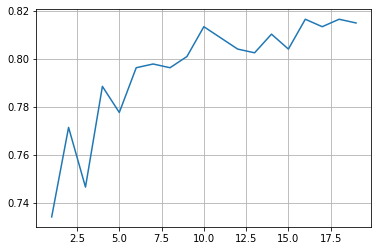

Best accuracy achived = 0.8133748055987559


In [15]:
plt.plot(range(1,20), ests)
plt.grid()
plt.show()

model = RandomForestClassifier(
    n_estimators=10,
    random_state=random_state,
)
model.fit(X_train, y_train.values.ravel())
accuracy = model.score(X_valid, y_valid)
models[model_name] = [model, accuracy]

print('Best accuracy achived = {}'.format(models[model_name][1]))

Как видно на графике, излом по точности модели наступает при 10 деревьях, эту модель и оставляем

<div class="alert alert-block alert-success">

<b>Успех:</b> Хорошо проделан шаг. Радует корректное использование валидационной выборки 
</div>
<div class="alert alert-block alert-info">

<b>Совет:</b> Обрати также внимание на GridSearchCv и RandomizedSearchCV, эти инструменты могут быть удобными, когда большое количество параметров, уменьшает количество необходимых выборок, и делает код более лаконичным.
</div>


## Проверьте модель на тестовой выборке

### Перекалибровка моделей на тренировочных и валидационных данных

In [16]:
for model_name in model_names:
    models[model_name][0].fit(X_model, y_model.values.ravel())
    print('Re-fit for model {} done.'.format(model_name))


Re-fit for model logreg done.
Re-fit for model tree done.
Re-fit for model forrest done.


### Тестирование

In [17]:
for model_name in model_names:
    accuracy = models[model_name][0].score(X_test, y_test)
    print('Test accuracy for model {}: {}'.format(model_name, accuracy))


Test accuracy for model logreg: 0.7091757387247278
Test accuracy for model tree: 0.7838258164852255
Test accuracy for model forrest: 0.7931570762052877


На тестовой выборке наилучшую точность показывает случайный лес, наихудшую - логистическая регрессия.



<div class="alert alert-block alert-success">

<b>Успех:</b> На тестовой выборке получено хорошее качество, но знай, что тестирование положено проводить для одной наилучшей модели. На предыдущем шаге мы должны были настроить модели и выбрать одну наилучшую, опираясь на метрики данные заказчиком (это может быть качество, время обучения, скорость предсказания и т.п.)
</div>
<div class="alert alert-block alert-info">

<b>Совет:</b> 
 Перед тестированием можно объединять валидационную и тренировочную выборку в одну обучающую, это может дать нам немного качества <br> 
</div>



<div class="alert alert-block alert-warning">
<b>Изменения:</b>
Добавлена рекалибровка
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт
</div>

## (бонус) Проверьте модели на адекватность

Для проверки на адекватность моделей рассмотрим 2 набора входных данных - минимальные и близкие к максимуму начального набора. На графиках и по описательной статистике (см. ниже) видно, что тариф ультра (1) более склонны приобретать клиенты с высоким потреблением услуг, а тариф смарт (0) - менее активные пользователи.

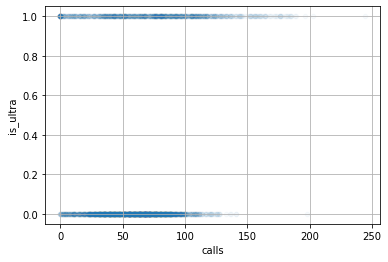

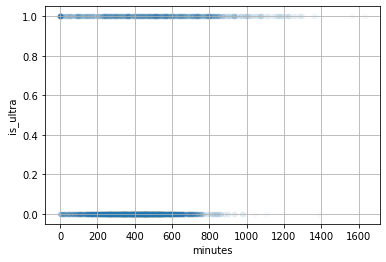

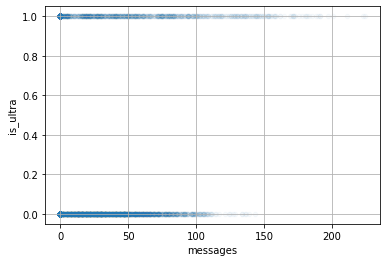

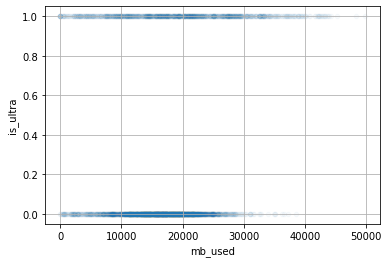

In [18]:
for col_name in data[features_columns].columns:
    data.plot(
        x=col_name,
        y='is_ultra',
        kind='scatter',
        alpha=0.03
    );
    plt.grid()
    plt.show()

In [19]:
data[data['is_ultra'] == 1].describe()

,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


In [20]:
data[data['is_ultra'] == 0].describe()

,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


In [21]:
X_min = pd.DataFrame({
    'calls': [0],
    'minutes': [0],
    'messages': [0],
    'mb_used': [0],
})
y_min = 1
X_max = pd.DataFrame({
    'calls': [200],
    'minutes': [1500],
    'messages': [200],
    'mb_used': [40000],
})
y_max = 1
adequacy = pd.DataFrame({
    'model': model_names
}) 
adequacy

,model
0,logreg
1,tree
2,forrest


In [22]:
predictions = []
for model_name in model_names:
    predictions.append(models[model_name][0].predict(X_min))
adequacy['predicted_min'] = pd.DataFrame(predictions)
adequacy['expected_min'] = y_min

for model_name in model_names:
    predictions.append(models[model_name][0].predict(X_max))
adequacy['predicted_max'] = pd.DataFrame(predictions)
adequacy['expected_max'] = y_max

adequacy

,model,predicted_min,expected_min,predicted_max,expected_max
0,logreg,0,1,0,1
1,tree,0,1,0,1
2,forrest,1,1,1,1


Как видно, несмотря на достаточно высокую точность на тестовых данных (не менее 70%) модели весьма плохо предсказали тариф для крайних случаев. Т.е. есть либо есть вопросы к адекватности моделей, либо пользователи пользуются иной, а не ожидаемой логикой при выборе тарифов.

<div class="alert alert-block alert-success">

<b>Успех:</b> Неплохой подход к решению бонусному заданию

<div class="alert alert-block alert-info">

<b>Совет:</b> <br> 1) Здесь больше подразумевалось сравнить наши модели с фиктивной/случайной, может нам стоит всегда предсказывать наибольший класс и результат будет не хуже. Для данной задачи удобен инструмент DummyClassifier <br> 2) Не забывай уделять больше внимания итоговому выводу, это важная часть проекта и сюда будут обращено особое внимание</div> 

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
Ниже сделал расчет по DummyClassifier. Как я понимаю, он генерирует некоторые более-менее случайные результаты в соответствии с выбранной стратегией. Затем их следует сравнить с тем, что показывает модель и если dummy демонстрирует более высокую предсказательную способность, то модель ни к черту.
<br>Тут, как видно, при двух стратегиях точность приблежается к 0.7, что весьма высоко - почти равно модели логистической регрессии на тестовых данных и не так уж далеко от деревьев и с их 0.78-0.79.
Правильно я все понял?
<br>Как следует интерпретировать полученные результаты? Есть ли метрики, чтобы сравнить следует ли признать разницу между качеством dummy и моделей значимой?
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Да, ты все правильно пишешь. DummyClassifier задает порог адекватности, и если модель ее не превосходит, то ее смело можно выбрасывать. Для каждой метрики сответствует своя стратегия, например для accuracy - most_frequent, для f1 - constant (единица), для rmse - mean. И т.п.
</div> 

In [23]:
for strategy in ('most_frequent', 'prior', 'stratified', 'uniform'):
    dummy = DummyClassifier(
        strategy=strategy,
        random_state=random_state,
    )
    dummy.fit(X, y)
    res = dummy.predict(X)
    print('With strategy {} accuracy is: {}.'.format(strategy, dummy.score(X, y)))
res.shape

With strategy most_frequent accuracy is: 0.693528313627878.
With strategy prior accuracy is: 0.693528313627878.
With strategy stratified accuracy is: 0.5718730553827007.
With strategy uniform accuracy is: 0.4925326695706285.


(3214,)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
